# Lab 5 - Visualization PCA

## Dataset

The Forest Fires data is from a study conducted by Paulo Cortez and Aníbal Morais titled "A Data Mining Approach to Predict Forest Fires using Meteorological Data" from the University of Minho, Portugal. The data was collected from the Montesinho natural park in the northeast region of Portugal and it spans from January 2000 to December 2003. The purpose of it is to predict the burned area of forest fires using meteorological data and to improve firefighting resource management by prioritizing responses based on predictions.

Key features from the data set:
- Spatial and temporal features (X, Y, month, day)
- Meteorological data (temp, RH, wind, rain)
- Fire Weather Index components (FFMC, DMC, DC, ISI)
- Target variable (area, in hectares)

Relative Humidity (RH) represents the percentage of moisture in the air relative to the maximum it could hold at that temperature. Lower RH means drier conditions, which can increase fire risk.

Fine Fuel Moisture Code (FFMC) reflects the moisture content of surface litter and fine fuels. It influences how easily a fire can start and spread. The scale is from 0 to 101, where the higher it is, the more flammable.

Duff Moisture Code (DMC) represents the moisture in the upper soil layer or decomposed organic material (duff). It affects the fire intensity and resistance to control.

Drought Code (DC) measures the moisture in deep, compact organic layers. It represents long-term drying and deep burning potential.

Initial Spread Index (ISI) combines wind speed and FFMC to predict rate of fire spread immediately after ignition. Higher ISI means a fire will spread more quickly.

## Covariance Matrix with Heatmap

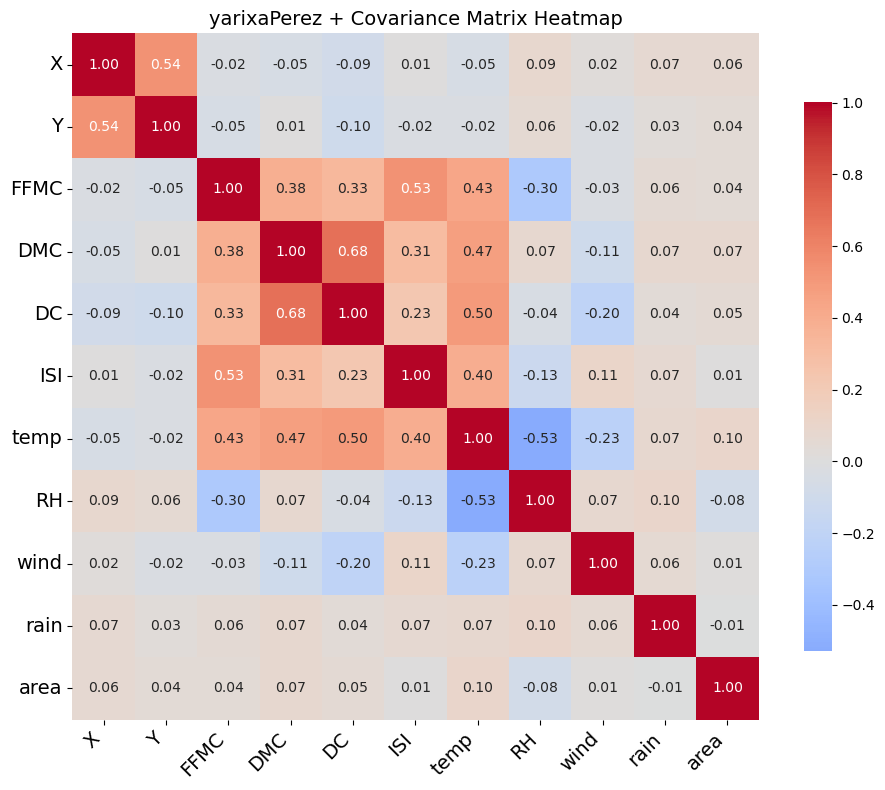

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib import font_manager

# Load data
df = pd.read_csv('forest-fires.csv')

# Select numeric attributes
num_attr = df.select_dtypes(include=[np.number]).columns
data     = df[num_attr]

# Standardize data
scaler   = StandardScaler()
x_scaled = scaler.fit_transform(data)

# Compute covariance matrix
matrix = np.cov(x_scaled, rowvar=False)
cov_df = pd.DataFrame(matrix, index=num_attr, columns=num_attr)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cov_df, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True, cbar_kws={'shrink': .8})

plt.title('yarixaPerez + Covariance Matrix Heatmap', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(rotation=0, fontsize=14)

plt.tight_layout()
plt.savefig('Lab5_yarixaPerez_covarianceMatrixHeatmap.png')
plt.show()

Explanation: The heatmap visualizes the covariance matrix of the standardized numerical features in the dataset. It shows the strength and direction of linear relationships between variables where red and blue tones indicate positive and negative covariances. The visualization helps identify correlated attributes which helps with dimensionality reduction adn feature selection.

## Eigenvalues and Eigenvectors

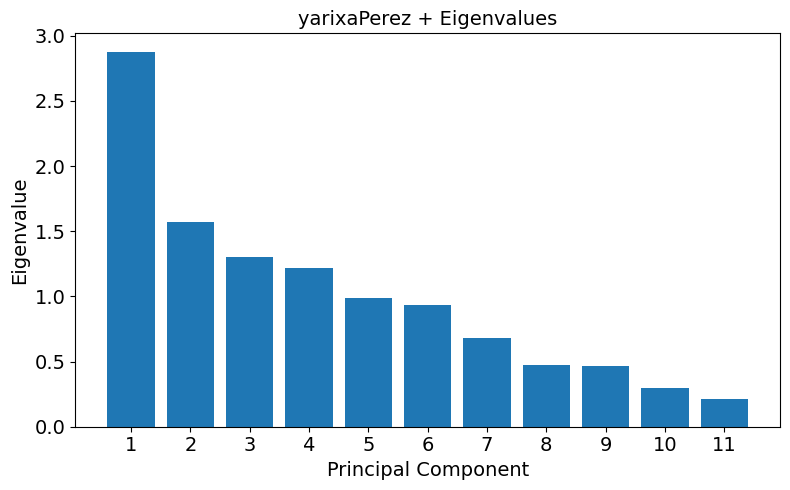

In [3]:
import numpy.linalg as la

# Compute eigenvalues of covariance matrix
eigenvalues, _ = la.eig(matrix)

# Sort in descending order
s_eigenvalues = np.sort(eigenvalues)[::-1]

# Eigenvalues bar chart
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(s_eigenvalues) + 1), s_eigenvalues)

plt.title('yarixaPerez + Eigenvalues', fontsize=14)
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Eigenvalue', fontsize=14)
plt.xticks(range(1, len(s_eigenvalues) + 1), fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.savefig('Lab5_yarixaPerez_eigenvaluesBarChart.png')
plt.show()

Explanation: Each eigenvalue corresponds to the variance explained by a principal component, and the bars are sorted in descending order to highlight the most prominent components. The visualization helps identify how many components capture most of the variance in the dataset. It guides dimensionality reduction decisions.

## Scree Plot - Cumulative Variance Explained

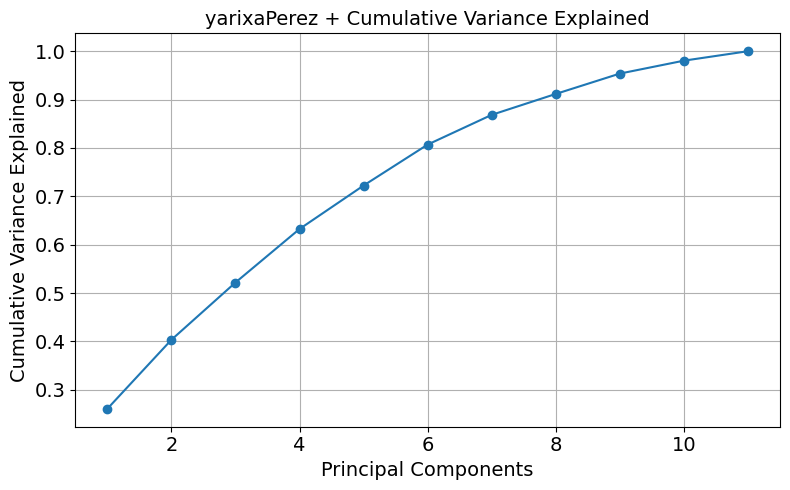

In [11]:
from sklearn.decomposition import PCA

# PCA
pca = PCA()
pca.fit(x_scaled)
c_var = np.cumsum(pca.explained_variance_ratio_)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(c_var) + 1), c_var, marker='o', linestyle='-')
plt.title('yarixaPerez + Cumulative Variance Explained', fontsize=14)
plt.xlabel('Principal Components', fontsize=14)
plt.ylabel('Cumulative Variance Explained', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig('Lab5_yarixaPerez_cveScreePlot.png')
plt.show()

Explanation:
The graph shows how much variance is explained as more principal components are included. The first components capture a significant portion of the variance. This suggests that dimensionality reduction is possible with minimal information loss. This is useful for simplifying the dataset for visualization or modeling.

## Scatterplot - PCA Projection by Temperature

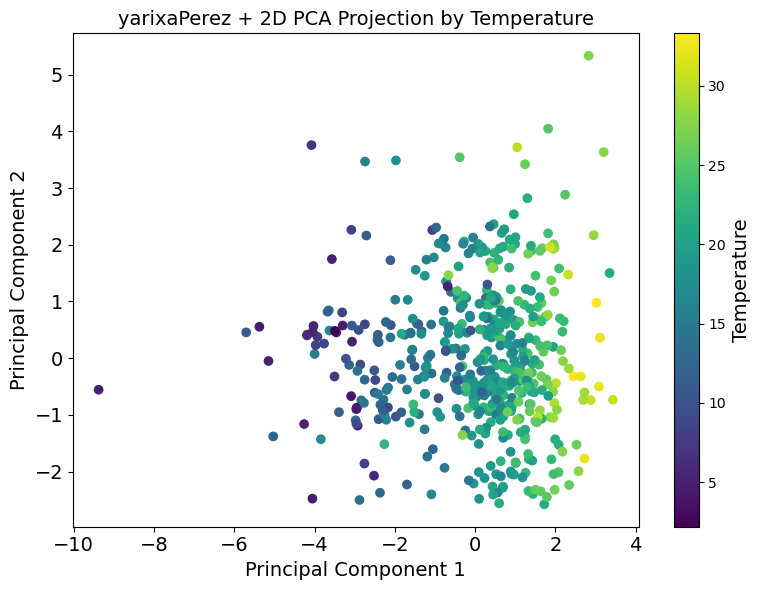

In [12]:
# PCA
pca = PCA()
pca_comp = pca.fit_transform(x_scaled)

# 2D scatterplot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_comp[:, 0], pca_comp[:, 1], c=df['temp'], cmap='viridis')
cbar = plt.colorbar(scatter)
cbar.set_label('Temperature', fontsize=14)
plt.title('yarixaPerez + 2D PCA Projection by Temperature', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('Lab5_yarixaPerez_2dPCAScatterPlot.png')
plt.show()

Explanation: The scatterplot reveals how observations spread across the first two principal components, with colors indicating temperature. Regions of similar color suggest temperature-based clustering. This implies a potential relationship between temperature and the underlying variance captured in PC1 and PC2.

## 3D PCA Plot - Three Principal Components

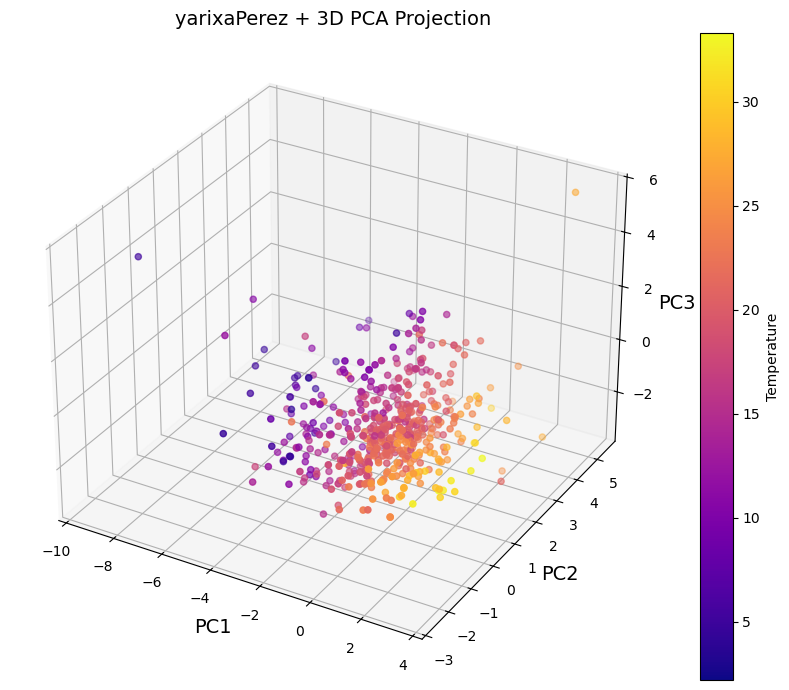

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(pca_comp[:, 0], pca_comp[:, 1], pca_comp[:, 2], c=df['temp'], cmap='plasma')
fig.colorbar(p, ax=ax, label='Temperature')
ax.set_title('yarixaPerez + 3D PCA Projection', fontsize=14)
ax.set_xlabel('PC1', fontsize=14)
ax.set_ylabel('PC2', fontsize=14)
ax.set_zlabel('PC3', fontsize=14)
plt.tight_layout()
plt.savefig('Lab5_yarixaPerez_3dPCAScatterPlot.png')
plt.show()

Explanation: This visualization adds depth by incorporating the third principal component. This shows how samples relate in a reduced space, revealing potential clusters or gradients linked to temperature. The clearer separation in 3D can help uncover nonlinear patterns not visible in 2D.